In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import sys
sys.path.append('../')
from modified_policy_iteration.modified_policy_iteration import modified_policy_iteration


In [2]:
np.random.seed(1)

desc= [
    "SFFHHFFF",
    "FFFFHFFF",
    "FFFFFFFF",
    "FFHFFHFH",
    "FFFFHFFF",
    "FHFFFFHH",
    "FFFFFFFF",
    "FFFHHFFG",

]

def run_multiple_policy_iterations(env_name, gamma=0.99, theta=1e-8, num_runs=1):
    all_avg_rewards = []
    games_won = []
    policies = []
    values = []
    for _ in range(num_runs):
        env = gym.make(env_name, desc=desc, render_mode=None, is_slippery=False)
        env.reset(seed=1)
        V, avg_rewards, games_won_count, _, policy = modified_policy_iteration(env, gamma)
        all_avg_rewards.append(avg_rewards)
        games_won.append(games_won_count)
        policies.append(policy)
        values.append(V)
    return np.array(all_avg_rewards), np.array(games_won), policies, np.mean(values, axis=0)

def plot_avg_rewards(all_avg_rewards, games_won):
    avg_rewards_mean = np.mean(all_avg_rewards, axis=0)
    avg_rewards_std = np.std(all_avg_rewards, axis=0)
    avg_games_won_mean = np.mean(games_won, axis=0)
    avg_games_won_std = np.std(games_won, axis=0)
    # iterations = np.arange(10, 10 * len(avg_rewards_mean) + 1, 10)
    iterations = np.arange(len(avg_rewards_mean))
    plt.errorbar(iterations, avg_rewards_mean, yerr=avg_rewards_std, fmt='-o', capsize=5, label='Avg Reward')
    plt.xlabel('Iterations')
    plt.ylabel('Average Reward')
    plt.title('Policy Iteration: Avg Reward with Error Bars')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.errorbar(iterations, avg_games_won_mean, yerr=avg_games_won_std, fmt='-o', capsize=5, label='Avg Games Won')
    plt.xlabel('Iterations')
    plt.ylabel('Average Games Won')
    plt.title('Policy Iteration: Average Games Won with Error Bars')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_value_function_heatmap(V, env_shape, title='Value Function Heatmap'):
    V_reshaped = np.reshape(V, env_shape)
    colors = [(1, 0, 0), (1, 1, 1), (0, 1, 0)]
    cmap = LinearSegmentedColormap.from_list('red_green', colors, N=256)
    plt.figure(figsize=(6, 6))
    sns.heatmap(V_reshaped, annot=True, cmap=cmap, cbar=True, square=True, vmin=0, vmax=1)
    plt.title(title)
    plt.show()

0


c:\Users\anant\.conda\envs\gpu-env\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Iteration 0, Mean Reward: 0.0, Games Won: 0, Avg Steps: 100.0
20
Iteration 20, Mean Reward: 0.8775210229989678, Games Won: 500, Avg Steps: 14.0
40
Iteration 40, Mean Reward: 0.8775210229989678, Games Won: 500, Avg Steps: 14.0
60
Iteration 60, Mean Reward: 0.8775210229989678, Games Won: 500, Avg Steps: 14.0
80
Iteration 80, Mean Reward: 0.8775210229989678, Games Won: 500, Avg Steps: 14.0
100
Iteration 100, Mean Reward: 0.8775210229989678, Games Won: 500, Avg Steps: 14.0
120
Iteration 120, Mean Reward: 0.8775210229989678, Games Won: 500, Avg Steps: 14.0
140
Iteration 140, Mean Reward: 0.8775210229989678, Games Won: 500, Avg Steps: 14.0
160
Iteration 160, Mean Reward: 0.8775210229989678, Games Won: 500, Avg Steps: 14.0
180
Iteration 180, Mean Reward: 0.8775210229989678, Games Won: 500, Avg Steps: 14.0
200
Iteration 200, Mean Reward: 0.8775210229989678, Games Won: 500, Avg Steps: 14.0
220
Iteration 220, Mean Reward: 0.8775210229989678, Games Won: 500, Avg Steps: 14.0
240
Iteration 240, Mea

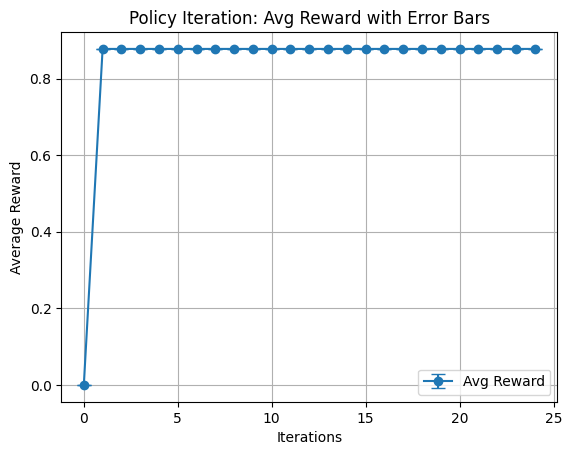

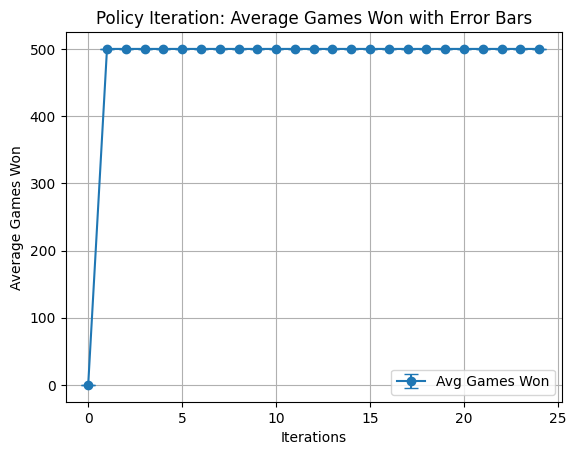

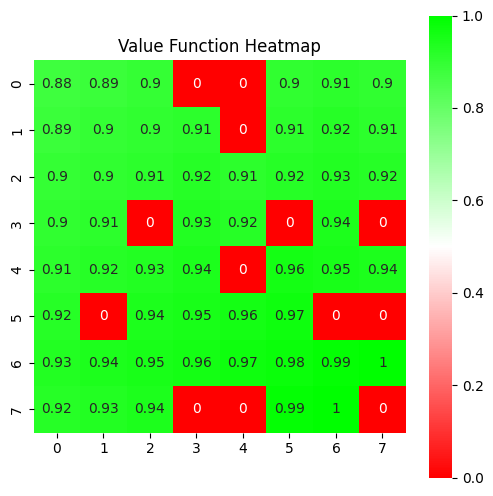

In [3]:
all_avg_rewards, games_won, policies, values = run_multiple_policy_iterations('FrozenLake-v1', gamma=0.99, theta=1e-8, num_runs=10)
plot_avg_rewards(all_avg_rewards, games_won)
plot_value_function_heatmap(values, (8, 8))

In [ ]:
import imageio


def display_avg_rewards_and_play_game(all_avg_rewards, games_won, policies, env_name):
    policy_number = 1
    env = gym.make(env_name, desc=desc, render_mode="rgb_array", is_slippery=False)
    policy = policies[policy_number]
    state, _ = env.reset()
    done = False
    truncated = False
    frames = []
    while not (done or truncated) :
        action = policy[state]
        state, reward, done, truncated, info = env.step(action)
        frame = env.render() 
        frames.append(frame)

    env.close()
    gif_filename = 'Modified_Policy_Iteration_Gameplay.gif'
    imageio.mimsave(gif_filename, frames, fps=3, loop=0)
    print(f"GIF saved as {gif_filename}")


display_avg_rewards_and_play_game(all_avg_rewards, games_won, policies, 'FrozenLake-v1')
